In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('seaborn')

## Extracting coronavirus data from a secondary source:

ccdc_data=pd.read_html('https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/')
ccdc_data[0].iloc[:,[0,2]].set_index(0)


## USA data used at end
us_death_rate=pd.read_html('https://www.statista.com/statistics/241572/death-rate-by-age-and-sex-in-the-us/')[0].iloc[2:,:].reset_index(drop=True)
us_population=pd.read_html('https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/')[0]

#### UK data used at end

### For death rage:
## Direct link:
##'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fdeathregistrationssummarytablesenglandandwalesdeathsbysingleyearofagetables%2f2018/deathsyoauk2018.xls'
## Found on this page:
##'https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathregistrationssummarytablesenglandandwalesdeathsbysingleyearofagetables'

### For population:
## Direct link:
## https://www.ons.gov.uk/visualisations/dvc671/pyramids2/datadownload.xls
## Found on this page
## 'https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/articles/overviewoftheukpopulation/august2019'

## Coronavirus data
Table from [the CCDC febuary 17th report pdf](http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-41e9-9a9b-fea8db1a8f51)  copy pasted into a text file ('corona.txt')

Commas removed to ease importing.

In [2]:
corona_df_imp = pd.read_csv('corona.txt', sep='\t', lineterminator='\n').set_index('Age, years')
corona_df_imp.head(2)

,"Confirmed cases, N (%)","Deaths, N (%)","Case fatality rate, %","Observed time, PD","Mortality, per 10 PD\r"
"Age, years",,,,,
0–9,416 (0.9),−,−,"4,383",−\r
10–19,549 (1.2),1 (0.1),0.2,"6,625",0.002\r


In [3]:
corona_df=corona_df_imp.iloc[:,:2].applymap(lambda x: x.split('(')[0]).replace({'−':0}).astype(int)
corona_df['Case fatality rate in China, %'] = 100*corona_df['Deaths, N (%)']/corona_df['Confirmed cases, N (%)']
corona_df.head(2)

,"Confirmed cases, N (%)","Deaths, N (%)","Case fatality rate in China, %"
"Age, years",,,
0–9,416,0,0.000000
10–19,549,1,0.182149


## Comparison of chinese death rates and coronavirus

The best data for populations and deaths I could find for China was from the census taken 10 years ago.
Ofcourse the death rate will have changed in such a modernising country.


In [4]:

df_chn=pd.read_html('http://www.stats.gov.cn/english/Statisticaldata/CensusData/rkpc2010/html/a0604a.htm', skiprows=4)[0].set_index(0).iloc[range(1,126,6),:6]

In [5]:
## Aggregating to 10 years

df_chn=df_chn.append(pd.Series(np.zeros(6), index = df_chn.columns,name = ''))
df_chn_10 = (df_chn.iloc[::2].reset_index()+df_chn.iloc[1::2].reset_index())
df_chn_10.columns = ('Index','Total pop','Male pop','Female pop','Total deaths','Male deaths','Female deaths')
df_chn_10=df_chn_10.set_index('Index')

In [6]:
## Aggregating all 80+ entries
df_chn_80 = df_chn_10.iloc[-3:].sum()
df_chn_80.name = '80 + '
df_chn_10 = df_chn_10.iloc[:-3].append(df_chn_80)

In [7]:
df_chn_10.index = corona_df.index

df_chn_10['Total death rate'] = 100*df_chn_10['Total deaths']/df_chn_10['Total pop']
df_chn_10['Male death rate'] = 100*df_chn_10['Male deaths']/df_chn_10['Male pop']
df_chn_10['Female death rate'] = 100*df_chn_10['Female deaths']/df_chn_10['Female pop']

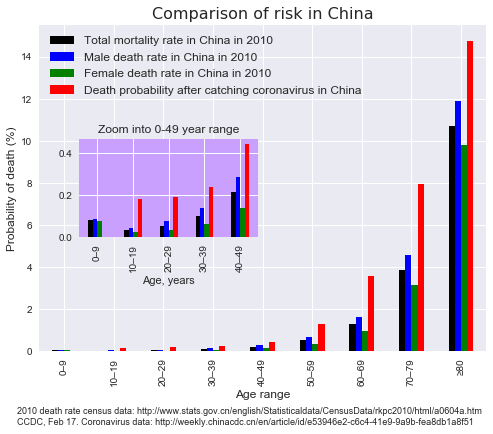

In [10]:
fig, ax = plt.subplots()
 

dft=pd.concat((df_chn_10.iloc[:,-3:],corona_df['Case fatality rate in China, %'] ), axis=1)


legend = ('Total mortality rate in China in 2010','Male death rate in China in 2010',
          'Female death rate in China in 2010',
          'Death probability after catching coronavirus in China')
dft.columns=legend


dft.iloc[:].plot(kind='bar', ax=ax, figsize=(8,6), color=list('kbgr')*9)

ax.legend(loc=2, prop={'size': 12})

plt.ylabel('Probability of death (%)',size=12)
plt.xlabel('Age range', size=12)
plt.title('Comparison of risk in China', fontsize=16,fontname='Ubuntu')

axins = inset_axes(ax, "40%", "30%", loc=6,borderpad =4)
axins.set_facecolor('xkcd:pastel purple')
plt.title('Zoom into 0-49 year range')

dft.iloc[:5,:].plot(kind='bar',ax=axins, color=list('kbgr')*9)
axins.get_legend().remove()
textstr = """2010 death rate census data: http://www.stats.gov.cn/english/Statisticaldata/CensusData/rkpc2010/html/a0604a.htm \n 
CCDC, Feb 17. Coronavirus data: http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-41e9-9a9b-fea8db1a8f51"""
props = dict(boxstyle='round', facecolor='wheat', alpha=1.)

ax.text(-.05, -.17, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', linespacing = 0.5    )

plt.savefig('dr_vs_corona.png', bbox_inches='tight')

# Addition of annual death rates of USA and UK

This is a even worse weaker comparison than above, only used for extra context

In [9]:
df_all=pd.read_csv('country_comparions.csv')
df_all.head()

FileNotFoundError: [Errno 2] File b'country_comparions.csv' does not exist: b'country_comparions.csv'

In [ ]:
dft = df_all.loc[:,['Total chn dr','US average death rate (%)','Total UK dr','Case fatality rate in China, %']]

In [ ]:
fig, ax = plt.subplots()
plt.style.use('seaborn')


legend = ('Total mortality rate in China in 2010','Total mortality rate in USA in 2010',
          'Total mortality rate in UK in 2010',
          'Death probability after catching coronavirus in China')
dft.columns=legend


dft.iloc[:].plot(kind='bar', ax=ax, figsize=(8,6), color=list('kbgr')*9)

ax.legend(loc=2, prop={'size': 12})

plt.ylabel('Probability of death (%)',size=12)
plt.xlabel('Age range', size=12)
plt.title('Comparison of risk in China', fontsize=16,fontname='Ubuntu')

axins = inset_axes(ax, "40%", "30%", loc=6,borderpad =4)
axins.set_facecolor('xkcd:pastel purple')
plt.title('Zoom into 0-49 year range')

dft.iloc[:5,:].plot(kind='bar',ax=axins, color=list('kbgr')*9)
axins.get_legend().remove()
# textstr = """2010 death rate census data: http://www.stats.gov.cn/english/Statisticaldata/CensusData/rkpc2010/html/a0604a.htm \n 
# CCDC, Feb 17. Coronavirus data: http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-41e9-9a9b-fea8db1a8f51"""
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)

# ax.text(-.05, -.17, textstr, transform=ax.transAxes, fontsize=9,
#         verticalalignment='top', linespacing = 0.5    )

plt.savefig('country_vs_corona.png', bbox_inches='tight')

# Below is the derivations of USA and UK data
Basically deriving the 10 year death rates (to match coronavirus statistics), which require summations of populations and deaths for each 10 year range, averaging the death rates would lead to inaccuracies. 

## Derivation of 10 year period US death rates

In [ ]:
df_dr_us_import = pd.read_html('https://www.statista.com/statistics/241572/death-rate-by-age-and-sex-in-the-us/')[0]
df_dr_us = df_dr_us_import.iloc[2:].set_index('Age Group')
df_dr_us.iloc[0,:]=df_dr_us.iloc[0,:]+df_dr_us_import.iloc[1,1:].values
df_dr_us.columns = ['M death rate (per 100,000)', 'F death rate (per 100,000)']
df_pop_us = us_population.set_index('Age in years')
df_pop_us.columns = ['M population (millions)', 'F population (millions)']

df_dr_us.index = df_pop_us.index
df_us = pd.concat([df_pop_us,df_dr_us],axis=1)


In [ ]:
df_us['T population (millions)']=df_us['M population (millions)']+df_us['F population (millions)']

In [ ]:
# df_us['M deaths'] = 
df_us['M deaths']=df_us['M population (millions)']*df_us['M death rate (per 100,000)']*10
df_us['F deaths']=df_us['F population (millions)']*df_us['F death rate (per 100,000)']*10
df_us['T deaths'] = df_us['M deaths']+df_us['F deaths']

In [ ]:
## Aggregating to 10 years

# df_us=df_us.append(pd.Series(np.zeros(6), index = df_us.columns,name = ''))
df_us_10 = (df_us.iloc[::2].reset_index()+df_us.iloc[1::2].reset_index())
df_us_10=df_us_10.loc[:,['M population (millions)','F population (millions)','T population (millions)','M deaths','F deaths','T deaths']]
df_us_10['US male death rate (%)'] = df_us_10['M deaths']/(10000*df_us_10['M population (millions)'])
df_us_10['US female death rate (%)'] = df_us_10['F deaths']/(10000*df_us_10['F population (millions)'])
df_us_10['US average death rate (%)'] = df_us_10['T deaths']/(10000*df_us_10['T population (millions)'])
df_us_10.index = corona_df.index
df_us_10.head(5)

### UK DATA

In [ ]:
UK_m_deaths = pd.read_excel('deathsyoauk2018.xls', sheet_name='Table 1', skiprows=3, skipfooter=7).set_index('Age')[2018]
UK_f_deaths = pd.read_excel('deathsyoauk2018.xls', sheet_name='Table 2', skiprows=3, skipfooter=7).set_index('Age')[2018]
uk_pop = pd.read_excel('uk_pop_data.xls', sheet_name='2018').iloc[[0],:].T
uk_pop= uk_pop.iloc[2:,0]
num_years = int(uk_pop.shape[0]/2)
df_uk_pop = pd.DataFrame([uk_pop.iloc[:num_years].values,uk_pop.iloc[num_years:].values]).T
df_uk_pop_tot = df_uk_pop.iloc[-1:] ## Removing the tot present in the excel file
df_uk_pop = df_uk_pop.iloc[:-1]
df_uk_pop[2]=df_uk_pop[0]+df_uk_pop[1]
df_uk_pop.columns = ['Male UK population','Female UK population','Total UK population']

In [ ]:
df_uk_deaths = pd.DataFrame([UK_m_deaths,UK_f_deaths]).T
df_uk_deaths.columns = ['Male UK deaths','Female UK deaths']
display(df_uk_deaths.iloc[-2]) ## The total deaths
df_uk_deaths = df_uk_deaths.iloc[:-3]
df_uk_deaths['Total UK deaths'] = df_uk_deaths.iloc[:,0]+df_uk_deaths.iloc[:,1]

In [ ]:
df_uk_full = pd.concat([df_uk_pop,df_uk_deaths], axis=1)

In [ ]:
df_uk=pd.DataFrame([])
for i in range(int(8)):
    s = df_uk_full.iloc[10*i:10*(i+1)].sum(axis=0)
    s.name = str(i)
    df_uk=df_uk.append(s)
    
s = df_uk_full.iloc[80:-1].sum(axis=0)
s.name = '80+'
df_uk=df_uk.append(s)
df_uk.index = corona_df.index

In [ ]:
df_uk['Male UK dr'] = 100*df_uk['Male UK deaths']/df_uk['Male UK population']
df_uk['Female UK dr'] = 100*df_uk['Female UK deaths']/df_uk['Female UK population']
df_uk['Total UK dr'] = 100*df_uk['Total UK deaths']/df_uk['Total UK population']

## Saving all formatted data for easy analysis



In [ ]:
chinese_data = df_chn_10.iloc[:,-3:]
chinese_data.columns = ['Total chn dr', 'Male chn death rate', 'Female chn dr']
df_all=pd.concat((chinese_data,df_uk[['Male UK dr','Female UK dr','Total UK dr']],df_us_10.iloc[:,-3:],corona_df['Case fatality rate in China, %'] ), axis=1)
df_all.to_csv('country_comparions.csv')

In [ ]:
df_all_totals = df_all.loc[:,['Total chn dr','US average death rate (%)','Total UK dr','Case fatality rate in China, %']]

In [ ]:
fig, ax = plt.subplots()
plt.style.use('seaborn')
 

dft=df_all_totals


legend = ('Total mortality rate in China in 2010','Total mortality rate in USA in 2010',
          'Total mortality rate in UK in 2010',
          'Death probability after catching coronavirus in China')
dft.columns=legend


dft.iloc[:].plot(kind='bar', ax=ax, figsize=(8,6), color=list('kbgr')*9)

ax.legend(loc=2, prop={'size': 12})

plt.ylabel('Probability of death (%)',size=12)
plt.xlabel('Age range', size=12)
plt.title('Comparison of risk in China', fontsize=16,fontname='Ubuntu')

axins = inset_axes(ax, "40%", "30%", loc=6,borderpad =4)
axins.set_facecolor('xkcd:pastel purple')
plt.title('Zoom into 0-49 year range')

dft.iloc[:5,:].plot(kind='bar',ax=axins, color=list('kbgr')*9)
axins.get_legend().remove()
# textstr = """2010 death rate census data: http://www.stats.gov.cn/english/Statisticaldata/CensusData/rkpc2010/html/a0604a.htm \n 
# CCDC, Feb 17. Coronavirus data: http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-41e9-9a9b-fea8db1a8f51"""
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)

# ax.text(-.05, -.17, textstr, transform=ax.transAxes, fontsize=9,
#         verticalalignment='top', linespacing = 0.5    )

plt.savefig('country_vs_corona.png', bbox_inches='tight')